**Check if NVIDIA GPU is enabled**

In [ ]:
!nvidia-smi

Fri Nov 13 10:09:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

**Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14370, done.
remote: Total 14370 (delta 0), reused 0 (delta 0), pack-reused 14370
Receiving objects: 100% (14370/14370), 13.09 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (9771/9771), done.


**Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**Configure Darknet network for training YOLO V3**

In [ ]:
!cp /mydrive/yolov3/yolov3_testing.cfg cfg/yolov3_testing.cfg

In [ ]:
!cp /mydrive/yolov3/obj.names data/obj.names
!echo -e 'classes= 3\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [ ]:
!pwd

/content/darknet


In [ ]:
!cp /mydrive/yolov3/darknet53.conv.74 darknet53.conv.74

In [ ]:
!cp darknet53.conv.74 /mydrive/yolov3/darknet53.conv.74

**Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/classes.txt    
  inflating: data/obj/maksssksksss0.png  
  inflating: data/obj/maksssksksss0.txt  
  inflating: data/obj/maksssksksss1.png  
  inflating: data/obj/maksssksksss1.txt  
  inflating: data/obj/maksssksksss10.png  
  inflating: data/obj/maksssksksss10.txt  
  inflating: data/obj/maksssksksss100.png  
  inflating: data/obj/maksssksksss100.txt  
  inflating: data/obj/maksssksksss101.png  
  inflating: data/obj/maksssksksss101.txt  
  inflating: data/obj/maksssksksss102.png  
  inflating: data/obj/maksssksksss102.txt  
  inflating: data/obj/maksssksksss103.png  
  inflating: data/obj/maksssksksss103.txt  
  inflating: data/obj/maksssksksss104.png  
  inflating: data/obj/maksssksksss104.txt  
  inflating: data/obj/maksssksksss105.png  
  inflating: data/obj/maksssksksss105.txt  
  inflating: data/obj/maksssksksss106.png  
  inflating: data/obj/maksssksksss106.txt  
  inflating: data/obj/maksssksksss107.png  
  inflating

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(numbers[0], numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

Streaming output truncated to the last 5000 lines.
1 0.0725 0.7711111111111111 0.065 0.22666666666666666
1 0.1075 0.29333333333333333 0.085 0.20444444444444446

['1', '0.1075', '0.29333333333333333', '0.085', '0.20444444444444446']
623 data/obj/maksssksksss792.txt
1 0.1075 0.29333333333333333 0.085 0.20444444444444446
1 0.84625 0.4111111111111111 0.0725 0.17333333333333334

['1', '0.84625', '0.4111111111111111', '0.0725', '0.17333333333333334']
623 data/obj/maksssksksss792.txt
1 0.84625 0.4111111111111111 0.0725 0.17333333333333334
1 0.9425 0.38666666666666666 0.115 0.18666666666666668
['1', '0.9425', '0.38666666666666666', '0.115', '0.18666666666666668']
623 data/obj/maksssksksss792.txt
1 0.9425 0.38666666666666666 0.115 0.18666666666666668
1 0.50125 0.39598997493734334 0.2175 0.2506265664160401
['1', '0.50125', '0.39598997493734334', '0.2175', '0.2506265664160401']
624 data/obj/maksssksksss617.txt
1 0.50125 0.39598997493734334 0.2175 0.2506265664160401
1 0.15125 0.8444444444444444 0.

In [ ]:
import glob
images_list = glob.glob("data/obj/*.png")
print(images_list)

['data/obj/maksssksksss694.png', 'data/obj/maksssksksss519.png', 'data/obj/maksssksksss344.png', 'data/obj/maksssksksss613.png', 'data/obj/maksssksksss514.png', 'data/obj/maksssksksss738.png', 'data/obj/maksssksksss84.png', 'data/obj/maksssksksss815.png', 'data/obj/maksssksksss534.png', 'data/obj/maksssksksss597.png', 'data/obj/maksssksksss495.png', 'data/obj/maksssksksss809.png', 'data/obj/maksssksksss205.png', 'data/obj/maksssksksss291.png', 'data/obj/maksssksksss440.png', 'data/obj/maksssksksss790.png', 'data/obj/maksssksksss98.png', 'data/obj/maksssksksss43.png', 'data/obj/maksssksksss817.png', 'data/obj/maksssksksss641.png', 'data/obj/maksssksksss308.png', 'data/obj/maksssksksss574.png', 'data/obj/maksssksksss486.png', 'data/obj/maksssksksss649.png', 'data/obj/maksssksksss664.png', 'data/obj/maksssksksss109.png', 'data/obj/maksssksksss461.png', 'data/obj/maksssksksss498.png', 'data/obj/maksssksksss148.png', 'data/obj/maksssksksss47.png', 'data/obj/maksssksksss56.png', 'data/obj/ma

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data /mydrive/yolov3/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 3926: 0.475092, 0.530768 avg loss, 0.001000 rate, 10.308469 seconds, 251264 images, 0.368172 hours left
Loaded: 0.000069 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.942570, GIOU: 0.942438), Class: 0.808998, Obj: 0.284910, No Obj: 0.000537, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.181980, iou_loss = 0.069798, total_loss = 0.251778 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.830648, GIOU: 0.825444), Class: 0.999862, Obj: 0.935864, No Obj: 0.001133, .5R: 1.000000, .75R: 1.000000, count: 11, class_loss = 0.052724, iou_loss = 0.199021, total_loss = 0.251745 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.756931, GIOU: 0.752703), Class: 0.988550, Obj: 0.710659, No Obj: 0.000115, .5R: 0.800000, .75R: 0.600000, count: 5, class_loss = 0.200949, iou_loss = 0.221763, total_loss = 0.422712 
 total_bbox = 1047344, rewritten_bbox = 0.051464 % 
v3 

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

**Testing the model**

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)

!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_final.weights /mydrive/yolov3/sample/maksssksksss12.png


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

In [ ]:
!cp data/obj.names /mydrive/yolov3/obj.names

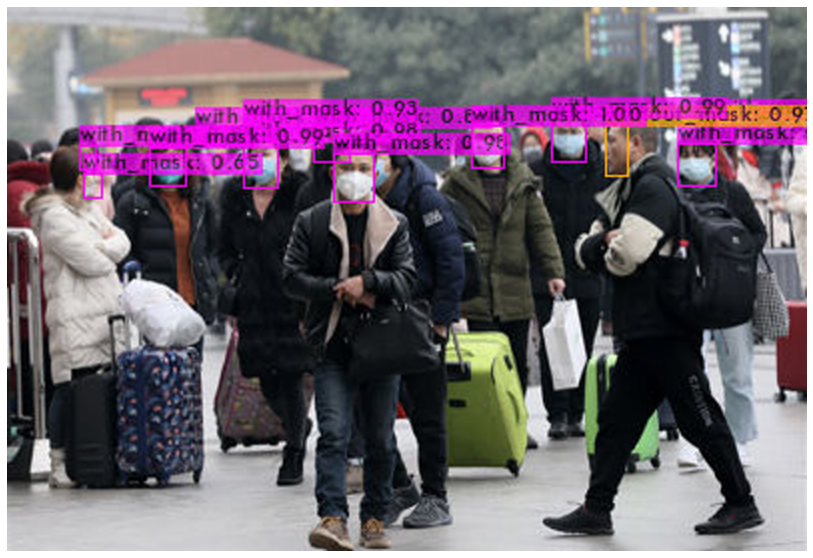

In [ ]:
imShow('predictions.jpg')

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)

!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_final.weights /mydrive/yolov3/sample/800.jpeg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

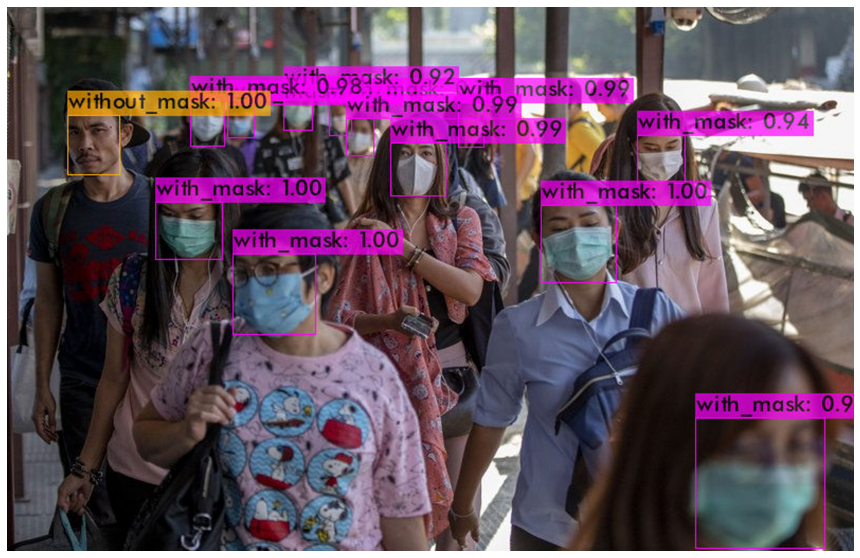

In [ ]:
imShow('predictions.jpg')

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)

!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_final.weights /mydrive/yolov3/sample/improper.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

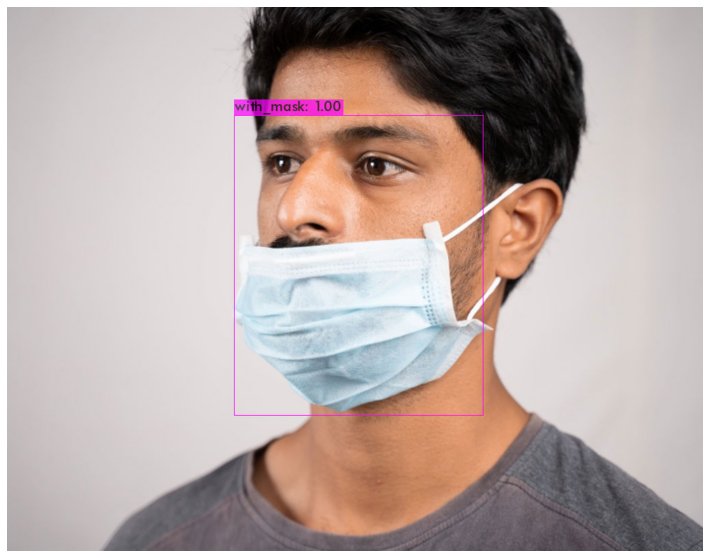

In [ ]:
imShow('predictions.jpg')